### Introduction 
We will start with Generic Graph search. Graph Search is an algorithm where, given a graph, G(V, E), with a starting vertex s 
∈
 V, we identify all vertices of G reachable from s
The generic graph search algorithm does the following, with the input grapg G = (V, E) and start vertex s

    mark s as explored and all other vertices as unexplored

    while there is an edge (v, w) in E where v is explored and w is not explored:
        mark w as explored 

***

The above algorithm is very abstract and the strategy to pick the edge is not specified. In the above algorithm, the vertex v is in the frontier and we wish to find all edges with one vertex in frontier and other outside. Two strategies that we can look at are
- For all vertices in the frontier, explore all edges that go from them to vertices outside the frontier
- Another strategy would be
    - Pick one vertex in the frontier
    - Pick one edge from the this vertex to another vertex not in frontier
    - Add this another vertex to the frontier and aggressively keep adding the vertices in the frontier before looking at another vertex, unlike the first strategy
These two approches are BFS(Breadth First Search) and DFS (Depth First Search) algorothms for graph exploration. While they both work for finding all possible vertices reachable from a starting vertex s in time 
θ(m+n), for some use cases we choose one over another.
For example, for computing the shortst distance to a vertex from a starting vertex s can be done only using BFS efficiently. Where as some use cases like finding strongly connected components in case of directed graphs, we need DFS.


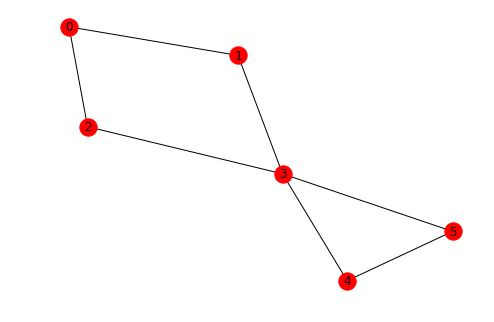

In [57]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

A = np.matrix([
   [0, 1, 1, 0, 0, 0],
   [1, 0, 0, 1, 0, 0],
   [1, 0, 0, 1, 0, 0],
   [0, 1, 1, 0, 1, 1],
   [0, 0, 0, 1, 0, 1],
   [0, 0, 0, 1, 1, 0],
])

G = nx.from_numpy_matrix(A)
nx.draw(G, with_labels = True)


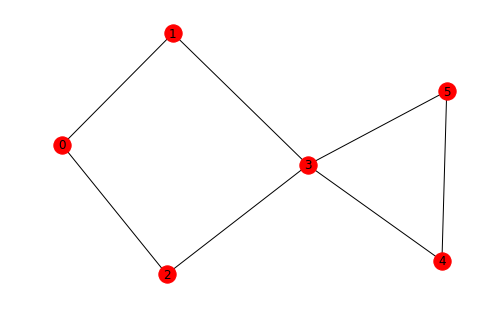

In [58]:
G = nx.Graph()
edges = [(0, 1), (0, 2), (2, 3), (1, 3), (3, 4), (3, 5), (4, 5)]
G.add_edges_from(edges)
nx.draw(G, with_labels = True)

Consider the above graph, starting from vertex 0 which is at level 0, vertices 1 and 2 are at level 1, vertex 3 at level 2 and vertices 4 and 5 at level 3.
<br>BFS will discover these edges in this very order.<br>
Following Python code makes use of queues and implements BFS and also give is the level of each of the vertex from a provided starting vertex. We saw how addacency lists can be defined in Python in previous notebook, to avoid copying over the code, we will make use of the graph defined in above cell from python package networkx version 2.2 to get adjacent edges of a given vertex.



In [80]:
adjacency_dict = {v: [e for e in ae] for v, ae in G.adjacency()}
adjacency_dict

{0: [1, 2], 1: [0, 3], 2: [0, 3, 5], 3: [1, 2, 4, 5], 4: [3, 5], 5: [2, 3, 4]}

If we look at the above dictionary, the key of the dictionary is the vertex and the value is the list of edges connected to it. With this dictionary, let us use bfs to find the level of vertices starting with vertex 0 as the starting vertex and see of we get the levels we expect.

## Breadth First Search (BFS)

In [1]:
import numpy as np
import networkx as nx
from multiprocessing import Queue
import matplotlib.pyplot as plt
import urllib3

def bfs(G, start):
    print("Nodes: {}".format(list(G.nodes)))
    nodes = list(G.nodes)
    order = 1
    explored = [0]*len(list(G.nodes))
    explored[nodes.index(start)] = order
    q = Queue()
    q.put(int(start))
    while not q.empty():
        v = q.get()
        w = list(G.adj[v])
        for adjnode in w:
            if explored[nodes.index(adjnode)] == 0:
                order += 1
                explored[nodes.index(adjnode)] = order
                q.put(int(adjnode))
    print("Order: {}".format(explored))

    
G = nx.Graph()
edges = [(0, 1), (0, 2), (2, 3), (1, 3), (3, 4), (3, 5), (4, 5)]
G.add_edges_from(edges)
nx.draw(G, with_labels = True)
bfs(G, 3)

Nodes: [0, 1, 2, 3, 4, 5]
Order: [0, 0, 0, 1, 0, 0]


##### BFS tracking Layers

Nodes: [0, 1, 2, 3, 4, 5]
Node 0 is at layer 0
Node 1 is at layer 1
Node 2 is at layer 1
Node 3 is at layer 2
Node 4 is at layer 3
Node 5 is at layer 2


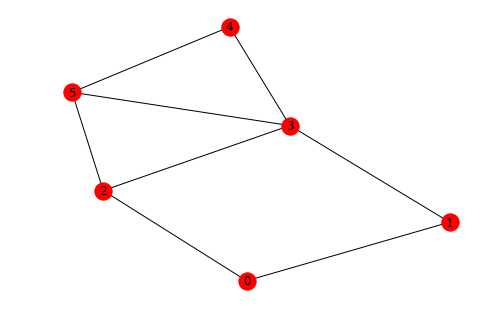

In [87]:
def bfs_layer(G, src):
    print("Nodes: {}".format(list(G.nodes)))
    nodes = list(G.nodes)
    explored = [0]*len(list(G.nodes))
    i = 0
    layer = 0
    explored[nodes.index(src)] = 1
    q = Queue()
    q.put(int(src))
    i += 1
    for node in nodes:
        G.nodes[node]['layer'] = float('inf')
    G.nodes[src]['layer'] = layer


    while i != 0:
        v = q.get()
        i -= 1
        w = list(G.adj[v])
        for adjnode in w:
            if explored[nodes.index(adjnode)] == 0:
                explored[nodes.index(adjnode)] = 1
                q.put(int(adjnode))
                i += 1
                G.nodes[adjnode]['layer'] = int(G.nodes[int(v)]['layer']) + 1
    for n, nlay in G.nodes.data():
        print("Node {} is at layer {}".format(n, nlay['layer']))

    
G = nx.Graph()
edges = [(0, 1), (0, 2), (2, 3), (1, 3), (3, 4), (3, 5), (4, 5), (2, 5)]
G.add_edges_from(edges)
nx.draw(G, with_labels = True)
bfs_layer(G, 0)

##### BFS tracking Shortest Path from source node to a destination node

Nodes: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
Destination Node 10 is at layer 3 having path ['0', '2', '5', '10']


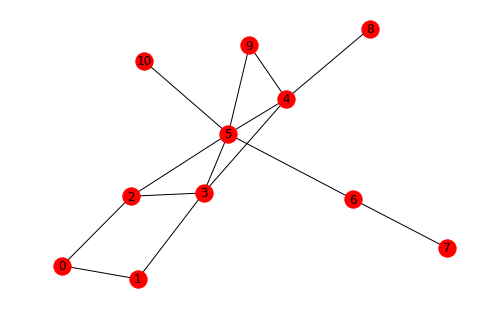

In [127]:
def bfs_shortestpath(G, src, dest):
    print("Nodes: {}".format(list(G.nodes)))
    nodes = list(G.nodes)
    explored = [0]*len(list(G.nodes))
    i = 0
    layer = 0
    foundat =  float('inf')
    explored[nodes.index(src)] = 1
    q = Queue()
    q.put(int(src))
    i += 1
    for node in nodes:
        G.nodes[node]['layer'] = float('inf')
        G.nodes[node]['path'] = []
    G.nodes[src]['layer'] = layer
    G.nodes[src]['path'].append(str(src))

    while i != 0:
        v = q.get()
        i -= 1
        w = list(G.adj[v])
        for adjnode in w:
            if explored[nodes.index(adjnode)] == 0:
                explored[nodes.index(adjnode)] = 1
                if adjnode == dest:
                    foundat = int(G.nodes[int(v)]['layer']) + 1
                q.put(int(adjnode))
                i += 1
                G.nodes[adjnode]['layer'] = int(G.nodes[int(v)]['layer']) + 1
                G.nodes[adjnode]['path'].append(str(G.nodes[int(v)]['path'][0]) +','+ str(adjnode))
    #print(G.nodes.data())
    if foundat !=  float('inf'):
        for n, ndict in G.nodes.data():
            if n == dest:
                print("Destination Node {} is at layer {} having path {}".format(n, ndict['layer'], ndict['path'][0].split(',')))  
    else:
        print("Destination Node {} not found".format(dest))
    

    
G = nx.Graph()
edges = [(0, 1), (0, 2), (2, 3), (1, 3), (3, 4), (3, 5), (4, 5), (2, 5), (5, 6), (6, 7), (4, 8), (4, 9), (5, 9), (5, 10)]
G.add_edges_from(edges)
nx.draw(G, with_labels = True)
bfs_shortestpath(G, 0, 10)

In [128]:
bfs_shortestpath(G, 0, 7)

Nodes: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
Destination Node 7 is at layer 4 having path ['0', '2', '5', '6', '7']


###### BFS tracking  Connected Components

Node 	 Connected Component 	 explored
0 	 0 			 1
1 	 0 			 1
2 	 0 			 1
3 	 0 			 1
4 	 0 			 1
5 	 0 			 1
6 	 0 			 1
7 	 0 			 1
8 	 8 			 1
9 	 8 			 1
10 	 8 			 1
11 	 11 			 1
12 	 11 			 1
13 	 11 			 1
14 	 8 			 1
15 	 15 			 1
16 	 15 			 1
17 	 15 			 1
18 	 15 			 1
19 	 15 			 1


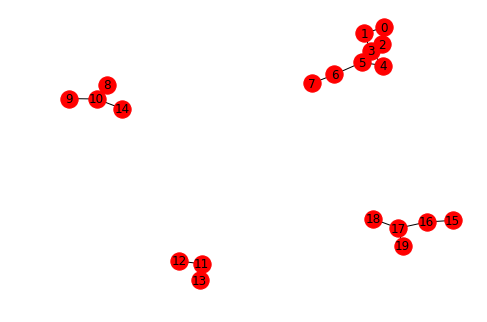

In [163]:
def bfs_connectedcomponents(G, start):
    #print("Nodes: {}".format(list(G.nodes)))
    i = 0
    q = Queue()
    q.put(int(start))
    G.nodes[start]['explored'] = 1
    G.nodes[start]['cc'] = start
    i += 1
    while i != 0:
        v = q.get()
        i -= 1
        w = list(G.adj[v])
        for adjnode in w:
            if G.nodes[adjnode]['explored'] == 0:
                G.nodes[adjnode]['explored'] = 1
                G.nodes[adjnode]['cc'] = start
                q.put(int(adjnode))
                i += 1

G = nx.Graph()
edges = [(0, 1), (0, 2), (2, 3), (1, 3), (3, 4), (3, 5), (4, 5), (2, 5), (5, 6), (6, 7), (10, 8), (10, 9), (11, 12), (11, 13), (10, 14), (15, 16), (16, 17), (17, 18), (17, 19)]
G.add_edges_from(edges)
for node in list(G.nodes):
    G.nodes[node]['explored'] = 0
    G.nodes[node]['cc'] =  float('inf')
nx.draw(G, with_labels = True)

for newnode in list(G.nodes):
    if G.nodes[newnode]['explored'] == 0:
        bfs_connectedcomponents(G, newnode)

print("Node \t Connected Component \t explored")
for n, ndict in G.nodes.data():
    print("{} \t {} \t\t\t {}".format(n, ndict['cc'], ndict['explored']))  
    #print("Node {} is in connected component {} and explored is {}".format(n, ndict['cc'], ndict['explored']))  

            

As we see above, we have four connected components made of vertices {0, 1, 2, 3, 4, 5, 6, 7}, {8, 9, 10, 14} , {11, 12, 13} and {15, 16, 17, 18, 19}

These three mentioned above are the connected components of the undirected graph above. In general for a set X, if x, y $\in$ X, then we write x ~ y if x is related to y.

For our graph, the set of the ser of vertices V. We write v ~ w if there is an edge between the vertices v and w. The equivalence relation has to satisfy the following three properties

- The relations are reflexive, which means x ~ x. In our graph each vertex if related to itself.
- The relation is symmetric, which means if x ~ y then y ~ x. In case of undirected graph, this is true as, if there is an edge between w and v there is also an edge between v and w
- The relation is transitive. Which means if x ~ y and y ~ z then x ~ z. In case of our graph, if we can reach from vertex x to y and we can reach from y to z, then we can reach from x to z.

The equivalence relations partitions the set into some sub sets. Each element in a class is related to each other element in that class and only to elements in that class.

In case of graph these classes are connected components.

***

##### Running time BFS

Lets look at the running time of this algorithm.

For BFS, the algorithm never processes a vertex more than once and thus one component of the complexity if linear in terms of the number of vertices n. If it processes a vertex, it will iterate over each edge of the graph which involves this vertex. Since each vertex if processed only once and each time we process all edges of that vertex, the complexity if also linear in the number of edges in that graph and thus the time complxity is $O(m + n)$

For the connected components (UCC) algorithm, we do a linear scan on all vertices and invoke BFS from a vertex only if it does not yet belong to a UCC, Thus for a connected component i, the complexity if $\theta(m_i + n_i)$

The total complexity therefore is $\theta(\sum_i{m_i} + \sum_i{n_i})$

The ucc algoritm discovers all the vertices across all the connected components and by definition of ucc, one vertex belongs to only one connected component. Therefore $\sum{n_i}$ will be same as the total vertices in the graph(s). Similarly, the edges in the connected components belong entirely to the vertices within that connected component and thus $\sum{m_i}$ is same as the number of edges in the graph and therefore the complexity of ucc is $\theta(m + n)$

## Depth First Search (DFS)
We will now look at another graph traversal algorithm, DFS.

Below, is an implementation using stack and a recursive implementation of DFS. 

##### DFS using Stack

Node 	 Connected Component 	 starting time 	 finishing time 	 explored
0 	 0 			 1 		 1 			 1
1 	 0 			 2 		 8 			 1
2 	 0 			 3 		 2 			 1
3 	 0 			 4 		 7 			 1
4 	 0 			 6 		 6 			 1
5 	 0 			 5 		 3 			 1
6 	 0 			 7 		 4 			 1
7 	 0 			 8 		 5 			 1
8 	 8 			 1 		 1 			 1
9 	 8 			 3 		 4 			 1
10 	 8 			 2 		 2 			 1
11 	 11 			 1 		 1 			 1
12 	 11 			 2 		 3 			 1
13 	 11 			 3 		 2 			 1
14 	 8 			 4 		 3 			 1
15 	 15 			 1 		 1 			 1
16 	 15 			 2 		 2 			 1
17 	 15 			 3 		 3 			 1
18 	 15 			 4 		 5 			 1
19 	 15 			 5 		 4 			 1


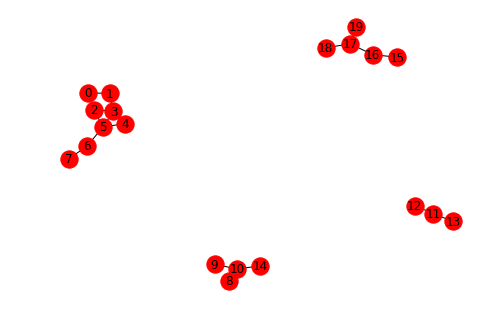

In [177]:
def dfs_stack(G, start):
    #print("Nodes: {}".format(list(G.nodes)))
    i = 0
    q = []
    order = 1
    ft = 0
    q.append(int(start))
    G.nodes[start]['explored'] = 1
    G.nodes[start]['cc'] = start
    G.nodes[start]['starting time'] = order
    i += 1
    while i != 0:
        v = q.pop()
        ft += 1
        G.nodes[v]['finishing time'] = ft
        i -= 1
        w = list(G.adj[v])
        #print(q)
        for adjnode in w:
            if G.nodes[adjnode]['explored'] == 0:
                G.nodes[adjnode]['explored'] = 1
                G.nodes[adjnode]['cc'] = start
                order += 1
                G.nodes[adjnode]['starting time'] = order
                q.append(int(adjnode))
                #print(q)
                i += 1

G = nx.Graph()
edges = [(0, 1), (0, 2), (2, 3), (1, 3), (3, 4), (3, 5), (4, 5), (2, 5), (5, 6), (6, 7), (10, 8), (10, 9), (11, 12), (11, 13), (10, 14), (15, 16), (16, 17), (17, 18), (17, 19)]
G.add_edges_from(edges)
for node in list(G.nodes):
    G.nodes[node]['explored'] = 0
    G.nodes[node]['cc'] =  float('inf')
    G.nodes[node]['starting time'] =  float('inf')
    G.nodes[node]['finishing time'] =  float('inf')
nx.draw(G, with_labels = True)

for newnode in list(G.nodes):
    if G.nodes[newnode]['explored'] == 0:
        dfs_stack(G, newnode)

print("Node \t Connected Component \t starting time \t finishing time \t explored")
for n, ndict in G.nodes.data():
    print("{} \t {} \t\t\t {} \t\t {} \t\t\t {}".format(n, ndict['cc'], ndict['starting time'], ndict['finishing time'], ndict['explored']))  
    #print("Node {} is in connected component {} and explored is {}".format(n, ndict['cc'], ndict['explored']))  

##### DFS using Recursion

Node 	 Connected Component 	 starting time 	 finishing time 	 explored
0 	 0 			 1 		 8 			 1
1 	 0 			 2 		 7 			 1
2 	 0 			 4 		 5 			 1
3 	 0 			 3 		 6 			 1
4 	 0 			 6 		 1 			 1
5 	 0 			 5 		 4 			 1
6 	 0 			 7 		 3 			 1
7 	 0 			 8 		 2 			 1
8 	 8 			 1 		 4 			 1
9 	 8 			 3 		 1 			 1
10 	 8 			 2 		 3 			 1
11 	 11 			 1 		 3 			 1
12 	 11 			 2 		 1 			 1
13 	 11 			 3 		 2 			 1
14 	 8 			 4 		 2 			 1
15 	 15 			 1 		 5 			 1
16 	 15 			 2 		 4 			 1
17 	 15 			 3 		 3 			 1
18 	 15 			 4 		 1 			 1
19 	 15 			 5 		 2 			 1


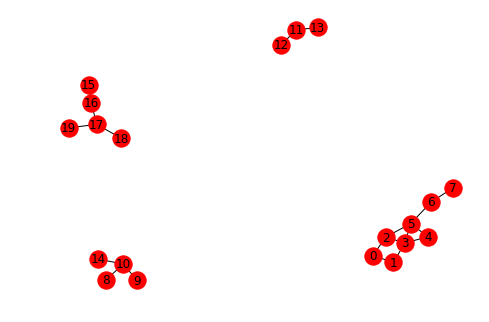

In [214]:
ft = 1
order = 1

def dfs_recursion(G, startvert, start):
    global ft
    global order
    #print("Nodes: {}".format(list(G.nodes)))
    G.nodes[startvert]['explored'] = 1
    G.nodes[startvert]['cc'] = start
    G.nodes[startvert]['starting time'] = order
    w = list(G.adj[startvert])
    for adjnode in w:
        if G.nodes[adjnode]['explored'] == 0:
            order = order+1
            dfs_recursion(G, adjnode, start)
            G.nodes[adjnode]['finishing time'] = ft
            ft += 1
    
def dfs(G, startvert, start):
    global ft
    global order
    ft = 1
    order = 1
    dfs_recursion(G, newnode, newnode)
    G.nodes[newnode]['finishing time'] = ft
            
        
G = nx.Graph()
#edges = [(0, 1), (0, 2), (2, 3), (1, 3), (3, 4), (3, 5), (4, 5), (2, 5), (5, 6), (6, 7)]
edges = [(0, 1), (0, 2), (2, 3), (1, 3), (3, 4), (3, 5), (4, 5), (2, 5), (5, 6), (6, 7), (10, 8), (10, 9), (11, 12), (11, 13), (10, 14), (15, 16), (16, 17), (17, 18), (17, 19)]
G.add_edges_from(edges)
for node in list(G.nodes):
    G.nodes[node]['explored'] = 0
    G.nodes[node]['cc'] =  float('inf')
    G.nodes[node]['starting time'] =  float('inf')
    G.nodes[node]['finishing time'] =  float('inf')
nx.draw(G, with_labels = True)

for newnode in list(G.nodes):
    if G.nodes[newnode]['explored'] == 0:
        dfs(G, newnode, newnode)

print("Node \t Connected Component \t starting time \t finishing time \t explored")
for n, ndict in G.nodes.data():
    print("{} \t {} \t\t\t {} \t\t {} \t\t\t {}".format(n, ndict['cc'], ndict['starting time'], ndict['finishing time'], ndict['explored']))  
    #print("Node {} is in connected component {} and explored is {}".format(n, ndict['cc'], ndict['explored']))  

##### Running time DFS
For running time of DFS, it is similar to BFS, each vertex is visited only once and we travse all edges from the vertex currently processed. Therefore the running time is $\theta(m + n)$

## Topological Sort
We will now look at an application of DFS, which is topological sort.<br><br>
**Topological ordering is implemented in the above graph and is given by it's "finishing time"**



Topological ordering of a graph G = (V, E) is assignment $f(v)$ to every vertex v $\in$ V such that for every edge (v, w) $\in$ E, $f(v) < f(w)$

Topological ordering is useful when we want to sequence tasks when precence constraints are respected.

<br><br>

## Kosaraju's Two-Pass Algorithm :  DFS - Strongly Connected Component

##### Computing Strongly connected components
Strongly connected component of a directed graph G with vertices V is a maximal set of S $\subseteq$ V, such that we can travese from any given vertex to any other vertex in these set of vertices.

The following directed graph has three strongly connected, components with each SCC as a vertex in the graph

##### Kosaraju's Two-Pass Algorithm using reverse deep copied  graph

Node 	 Strongly Connected Component 	 starting time 	 finishing time 	 explored
1 		 6 			 5 		 5 			 1
2 		 4 			 8 		 8 			 1
3 		 4 			 9 		 7 			 1
4 		 4 			 7 		 9 			 1
5 		 6 			 6 		 4 			 1
6 		 6 			 4 		 6 			 1
7 		 9 			 2 		 2 			 1
8 		 9 			 3 		 1 			 1
9 		 9 			 1 		 3 			 1


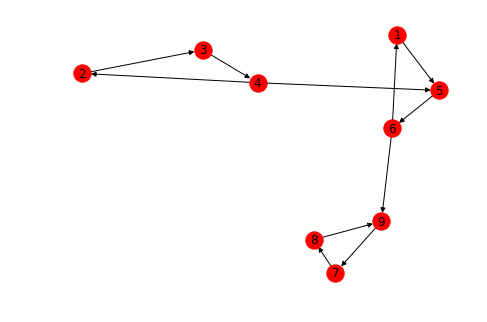

In [275]:
ft = 1
order = 1

def dfs_scc(G, startvert, start):
    global ft
    global order
    G.nodes[startvert]['explored'] = 1
    G.nodes[startvert]['scc'] = start
    G.nodes[startvert]['starting time'] = order
    w = list(G.adj[startvert])
    for adjnode in w:
        if G.nodes[adjnode]['explored'] == 0:
            order = order+1
            dfs_scc(G, adjnode, start)
            G.nodes[adjnode]['finishing time'] = ft
            ft += 1
    
def kosarajuSCC(DG):
    # 1st Pass
    reverseDG = DG.reverse() # default copy=True
    for node in list(reverseDG.nodes):
        reverseDG.nodes[node]['explored'] = 0
        reverseDG.nodes[node]['scc'] =  float('inf')
        reverseDG.nodes[node]['starting time'] =  float('inf')
        reverseDG.nodes[node]['finishing time'] =  node
    global ft
    global order
    ft = 0
    order = 0
    reversed_graph = reverseDG.nodes.data()
    nodes_reverse = []
    for n, ndict in reversed_graph:
        nodes_reverse.append(ndict['finishing time'])
    nodes_reverse.reverse()
    for node_ft in nodes_reverse:
        for n, ndict in reversed_graph:
            if ndict['finishing time'] == node_ft:
                if reverseDG.nodes[n]['explored'] == 0:
                    order = order+1
                    ft += 1
                    dfs_scc(reverseDG, n, n)
                    reverseDG.nodes[n]['finishing time'] = ft
    # 2nd Pass
    DG = reverseDG.reverse()
    ft = 0
    order = 0
    for node in list(DG.nodes):
        DG.nodes[node]['explored'] = 0
    orig_graph = DG.nodes.data()
    for node_ft in nodes_reverse:
        for n, ndict in orig_graph:
            if ndict['finishing time'] == node_ft:
                if DG.nodes[n]['explored'] == 0:
                    order = order+1
                    ft += 1
                    dfs_scc(DG, n, n)
                    DG.nodes[n]['finishing time'] = ft
                    
    print("Node \t Strongly Connected Component \t starting time \t finishing time \t explored")
    for n, ndict in DG.nodes.data():
        print("{} \t\t {} \t\t\t {} \t\t {} \t\t\t {}".format(n, ndict['scc'], ndict['starting time'], ndict['finishing time'], ndict['explored'])) 
    
            
        
DG = nx.DiGraph()
reverseDG = nx.DiGraph()
edges = [(9, 7), (7, 8), (8, 9), (6, 9), (5, 6), (6, 1), (1, 5), (4, 5), (3, 4), (4, 2), (2, 3)]
DG.add_edges_from(edges)
nx.draw(DG, with_labels = True)

kosarajuSCC(DG)    


#### Todo:  Challenging Problem:

Download the following text file:  SCC.txt
<br>
The file contains the edges of a directed graph. Vertices are labeled as positive integers from 1 to 875714. Every row indicates an edge, the vertex label in first column is the tail and the vertex label in second column is the head (recall the graph is directed, and the edges are directed from the first column vertex to the second column vertex). So for example, the $11^{th}$ row looks liks : "2 47646". This just means that the vertex with label 2 has an outgoing edge to the vertex with label 47646

Your task is to code up the algorithm from the video lectures for computing strongly connected components (SCCs), and to run this algorithm on the given graph.

Output Format: You should output the sizes of the 5 largest SCCs in the given graph, in decreasing order of sizes, separated by commas (avoid any spaces). So if your algorithm computes the sizes of the five largest SCCs to be 500, 400, 300, 200 and 100, then your answer should be "500,400,300,200,100" (without the quotes). If your algorithm finds less than 5 SCCs, then write 0 for the remaining terms. Thus, if your algorithm computes only 3 SCCs whose sizes are 400, 300, and 100, then your answer should be "400,300,100,0,0" (without the quotes).

WARNING: This is the most challenging programming assignment of the course. Because of the size of the graph you may have to manage memory carefully. The best way to do this depends on your programming language and environment.

In [ ]:
# Test case
http = urllib3.PoolManager()
r1 = http.request('GET', "https://d3c33hcgiwev3.cloudfront.net/_410e934e6553ac56409b2cb7096a44aa_SCC.txt?Expires=1561507200&Signature=b-X~V6kXqfyz3PUZ6frDKWfBOdTiNqzgLRrzd3UwTZ9XGBPhztKN0ZALk7pK-01DcpKHnyLPUZK0YHduav3xof2xNchlXUz5vJ67WgvEjevxo0Kf8F1jwKVUjEFqVnsTxxedXejOHcXYtoU-MVFJtYxiWp2veOruppHBmzYidAc_&Key-Pair-Id=APKAJLTNE6QMUY6HBC5A")
IntegerMatrixStringJoin = r1.data.split('\r\n')
IntegerMatrixString = IntegerMatrixStringJoin[0].split(' \n')
for i in IntegerMatrixString:
    from_to = i.split(' ')
    fromint = int(from_to[0])
    toint = int(from_to[1])
    print("from: {} \t to: {}".format(fromint, toint))
    DG.add_edge(fromint, toint)
    
kosarajuSCC(DG)  
